In [8]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import  classification_report, f1_score, confusion_matrix

In [9]:
cifar10 = tf.keras.datasets.cifar10

# Spliting into train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

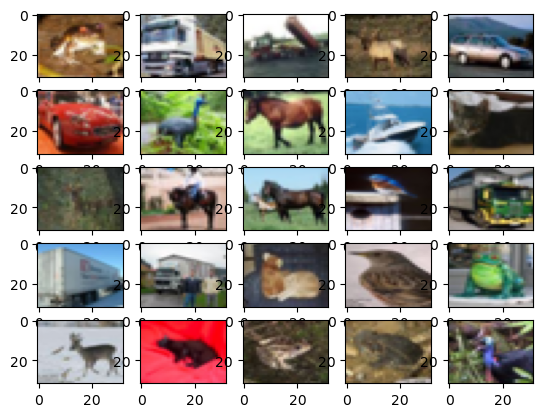

In [11]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
      for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [12]:
K = len(set(y_train))
print("number of classes:", K)

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16,

In [13]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [14]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 120s 75ms/step - loss: 1.4252 - accuracy: 0.5073 - val_loss: 1.1145 - val_accuracy: 0.6060
Epoch 2/50
1562/1562 [==============================] - 140s 89ms/step - loss: 0.9880 - accuracy: 0.6537 - val_loss: 0.9079 - val_accuracy: 0.6932
Epoch 3/50
1562/1562 [==============================] - 208s 133ms/step - loss: 0.8468 - accuracy: 0.7080 - val_loss: 0.8381 - val_accuracy: 0.7170
Epoch 4/50
1562/1562 [==============================] - 215s 138ms/step - loss: 0.7539 - accuracy: 0.7436 - val_loss: 0.7130 - val_accuracy: 0.7550
Epoch 5/50
1562/1562 [==============================] - 161s 103ms/step - loss: 0.6879 - accuracy: 0.7652 - val_loss: 0.6774 - val_accuracy: 0.7718
Epoch 6/50
1562/1562 [==============================] - 167s 107ms/step - loss: 0.6331 - accuracy: 0.7859 - val_loss: 0.5998 - val_accuracy: 0.7968
Epoch 7/50
1562/1562 [==============================] - 194s 124ms/step - loss: 0.5886 - accuracy: 0.7990 - val_lo

In [15]:
# model loss and accuracy on test data
loss = model.evaluate(x_test, y_test)
print (loss)

313/313 [==============================] - 18s 56ms/step - loss: 0.3876 - accuracy: 0.8787
[0.38758498430252075, 0.8787000179290771]


In [16]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(arr) for arr in y_pred]

313/313 [==============================] - 17s 53ms/step


In [17]:
# reshaping the test data into 1D array
y_test = y_test.reshape(-1,)

In [18]:
# Printing accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Accuracy: 0.8787
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1000
           1       0.93      0.96      0.94      1000
           2       0.79      0.88      0.84      1000
           3       0.80      0.75      0.77      1000
           4       0.89      0.88      0.88      1000
           5       0.88      0.78      0.82      1000
           6       0.87      0.93      0.90      1000
           7       0.93      0.92      0.92      1000
           8       0.97      0.87      0.92      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(0.5, 1.0, 'Confusion Matrix')

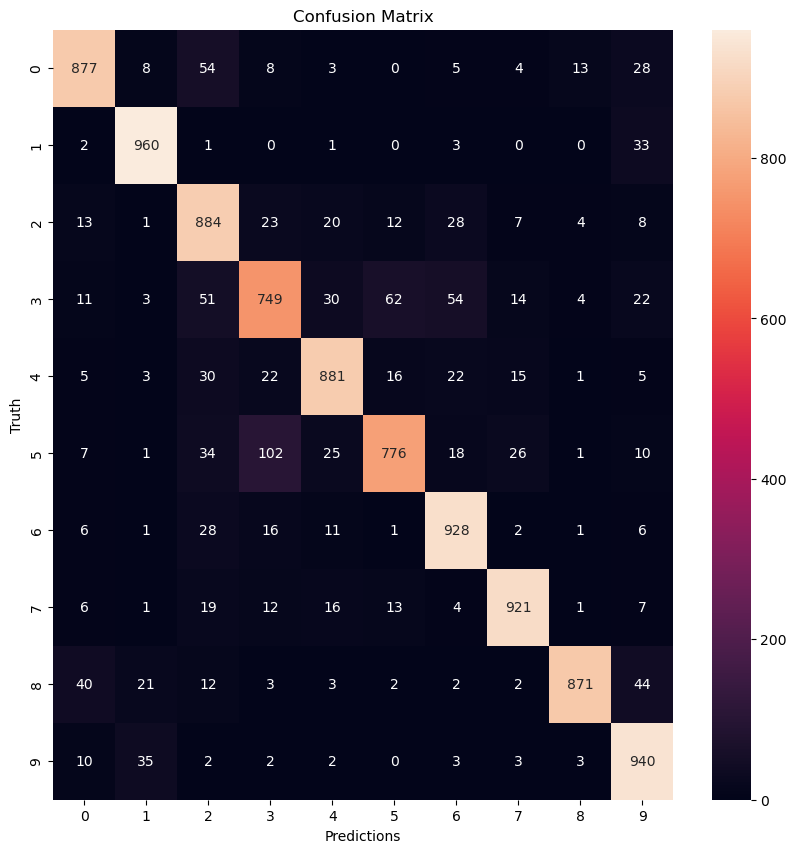

In [19]:
cnn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cnn, annot=True, fmt='d')
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")

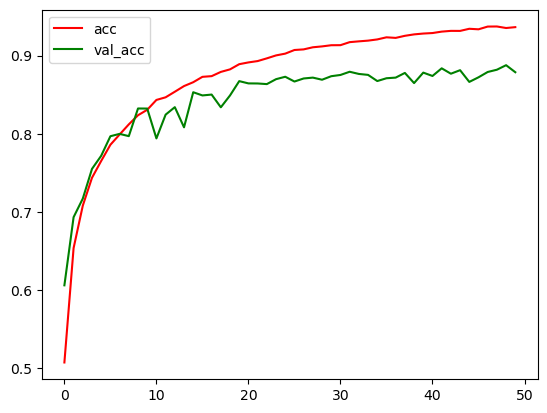

In [20]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 73ms/step
Original label is automobile and predicted label is automobile


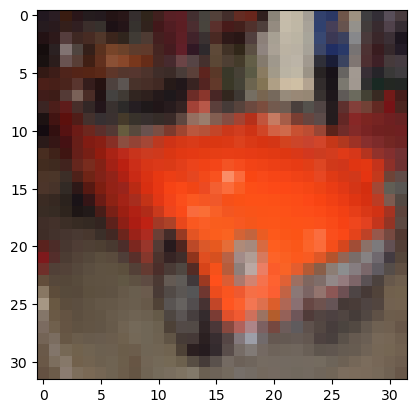

In [21]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
image_number = 1970
plt.imshow(x_test[image_number])
n = np.array(x_test[image_number])
p = n.reshape(1, 32, 32, 3)
predicted_label = labels[model.predict(p).argmax()]
original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

In [22]:
# save the model
model.save('image-classification-cnn.h5')